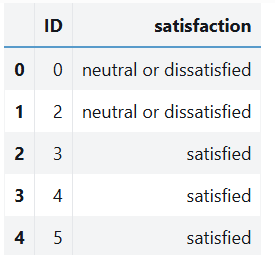

test 데이터에 대해서 neutral or dissatisfied라고 예측할 확률을 구하고 그 확률 값을 제출하라



In [ ]:
import pandas as pd
#데이터 로드
X_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/x_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/y_train.csv")
X_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/x_test.csv")


display(X_train.head())
display(y_train.head())
display(X_test.head())
y_train.select_dtypes(include='object')

,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,id
0,0,Female,Loyal Customer,54,Personal Travel,Eco,1068,3,4,3,...,5,5,3,5,3,5,3,47,22.0,NaN
1,2,Male,Loyal Customer,20,Personal Travel,Eco,1546,4,4,4,...,4,3,3,4,4,4,4,5,2.0,NaN
2,3,Male,Loyal Customer,59,Business travel,Business,2962,0,4,0,...,1,1,1,1,5,1,4,54,46.0,NaN
3,4,Male,Loyal Customer,35,Business travel,Eco Plus,106,5,4,4,...,5,2,1,5,4,4,5,130,121.0,NaN
4,5,Female,Loyal Customer,9,Business travel,Business,2917,3,3,3,...,4,4,4,5,4,3,4,0,0.0,NaN


,ID,satisfaction
0,0,neutral or dissatisfied
1,2,neutral or dissatisfied
2,3,satisfied
3,4,satisfied
4,5,satisfied


,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,id
0,1,Male,Loyal Customer,28,Business travel,Business,3414,2,2,2,...,2,4,5,4,4,4,2,0,0.0,40819.0
1,16,Female,disloyal Customer,34,Business travel,Eco,2556,1,1,1,...,2,5,1,5,1,3,2,15,0.0,33335.0
2,17,Female,Loyal Customer,23,Personal Travel,Eco,363,2,5,2,...,5,3,2,4,5,4,5,0,0.0,20749.0
3,25,Male,Loyal Customer,55,Business travel,Business,2079,1,1,1,...,1,1,1,1,4,1,3,0,0.0,92194.0
4,27,Female,Loyal Customer,44,Business travel,Eco,192,2,4,5,...,1,1,2,1,5,1,1,23,13.0,13904.0


,satisfaction
0,neutral or dissatisfied
1,neutral or dissatisfied
2,satisfied
3,satisfied
4,satisfied
...,...
83118,neutral or dissatisfied
83119,neutral or dissatisfied
83120,satisfied
83121,satisfied


In [ ]:
import pandas as pd
#데이터 로드
X_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/x_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/y_train.csv")
X_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/x_test.csv")


# print(X_train.isnull().sum())
# print(X_test.isnull().sum())
# print(y_train.isnull().sum())

# print(X_train.shape, X_test.shape, y_train.shape)

#결측치 제거할때는 항상 합쳤다가 다시 정의하기! -> 밑에 데이터 나누기가 안됨!
#그리고 test 데이터도 꼭 결측치 삭제 후 분리하기!! 왜냐면 마지막 제출할때 ID와 y값의 개수가 달라짐!
#여기에는 y_train을 concat을 처음에 했지만 이러면 ID가 2개생김 but 괜찮은 이유는 밑에 ID를 드랍해 버리기떄문!
#만약 ID가아닌 다른거라면 따로 빼서 해야함!
concat = pd.concat([X_train, y_train], axis =1)
concat = concat.dropna(subset = 'Arrival Delay in Minutes')
X_test = X_test.dropna(subset = 'Arrival Delay in Minutes')
X_train = concat.drop('satisfaction', axis =1)
target = concat['satisfaction']


X_train = X_train.drop(['id', 'ID'], axis=1)
X_test = X_test.drop('id', axis=1)
X_test_id = X_test.pop('ID')

#결측치 제거할때는 항상 합쳤다가 다시 정의하기! -> 밑에 데이터 나누기가 안됨!
# concat = pd.concat([X_train, target], axis =1)
# concat = concat.dropna(subset = 'Arrival Delay in Minutes')
# X_test = X_test.dropna(subset = 'Arrival Delay in Minutes')
# X_train = concat.drop('satisfaction', axis =1)
# target = concat['satisfaction']

#스켈링
X_train.select_dtypes(exclude = 'object')

from sklearn.preprocessing import RobustScaler
cols = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
scaler = RobustScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

#인코딩
X_test.select_dtypes(include = 'object').describe()
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',	'Customer Type',	'Type of Travel',	'Class']
for col in cols:
   le = LabelEncoder()
   le.fit(pd.concat([X_train[col], X_test[col]], axis=0))
   X_train[col] = le.transform(X_train[col])
   X_test[col] = le.transform(X_test[col])

#데이터 분리
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train,
                                            target,
                                            test_size = 0.2,
                                            random_state = 2025)

X_tr.shape, X_val.shape, y_tr.shape, y_val.shape


#학습
# 확률값을 예측하라 했으니 pred_proba 반드시, 그리고 accuray는 무조건 pred_proba!
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
pred_proba = model.predict_proba(X_val)[:,1]


#성능 검증
#매우중요!!!!! 여기서 분류가 0과 1이 아닌 문자열로 되어있기 때문에 각각을 누가 0이고 누가 1인지 구분해 줘야함
# neutral or dissatisfied 의 확률을 구하라 했으므로  neutral or dissatisfied 이게 1이되어야함!
# accuracy에는 pos_label 사용 불가능!
from sklearn.metrics import recall_score, precision_score, f1_score,roc_auc_score
print(recall_score(y_val,pred, pos_label =  'neutral or dissatisfied'))
print(precision_score(y_val, pred, pos_label =  'neutral or dissatisfied'))
print(f1_score(y_val, pred, pos_label =  'neutral or dissatisfied'))
print(roc_auc_score(y_val,pred_proba))


#기본
0.9795983086680761
0.9537875668999588
0.9665206508135169
0.9934921448402072


#제출
pred_result = model.predict(X_test)
result = pd.DataFrame({
                      'ID' : X_test_id,
                      'satisfaction' : pred_result
})

result.to_csv("23241.csv", index=False)


0.9811839323467231
0.9525862068965517
0.9666736096646532
0.9934255905486071


,Customer Type,Type of Travel,Class
count,20709,20709,20709
unique,2,2,3
top,Loyal Customer,Business travel,Business
freq,16927,14297,9898


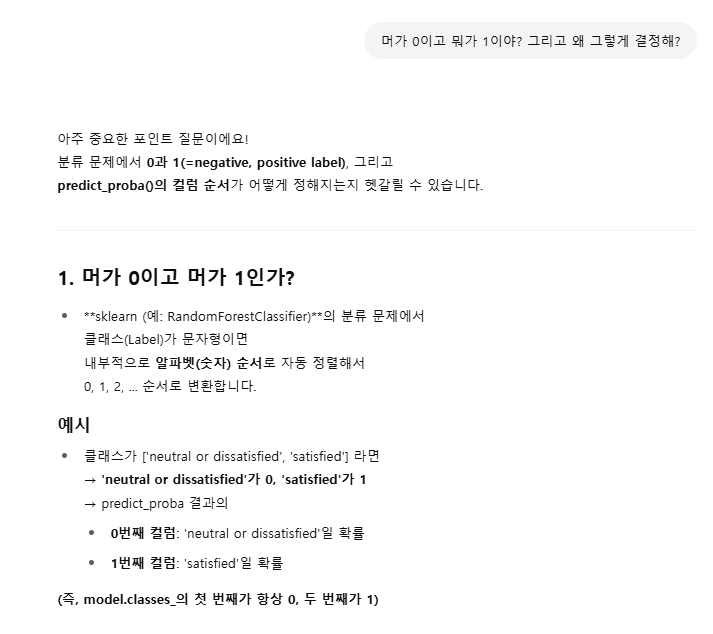

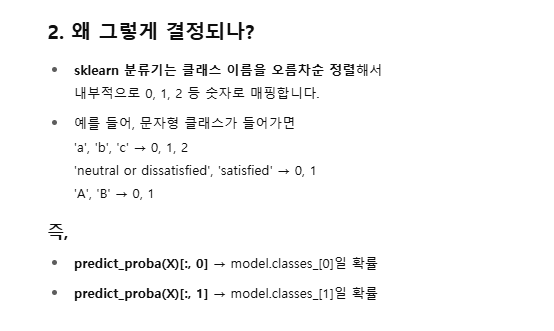

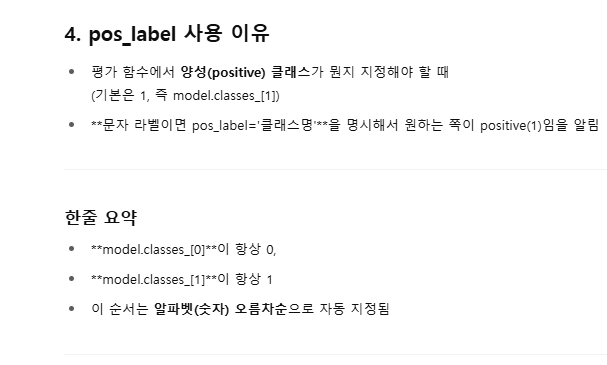

In [ ]:
import pandas as pd
#데이터 로드
X_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/x_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/y_train.csv")
X_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/x_test.csv")


# print(X_train.isnull().sum())
# print(X_test.isnull().sum())
# print(y_train.isnull().sum())

# print(X_train.shape, X_test.shape, y_train.shape)

#결측치 제거할때는 항상 합쳤다가 다시 정의하기! -> 밑에 데이터 나누기가 안됨!
#그리고 test 데이터도 꼭 결측치 삭제 후 분리하기!! 왜냐면 마지막 제출할때 ID와 y값의 개수가 달라짐!
# y_train은 이후에 쓰지 않으니 먼저 pop 해주고 하자
y_train_target = y_train['stisfaction']
concat = pd.concat([X_train, y_train], axis =1)
concat = concat.dropna(subset = 'Arrival Delay in Minutes')
X_test = X_test.dropna(subset = 'Arrival Delay in Minutes')
X_train = concat.drop('satisfaction', axis =1)
target = concat['satisfaction']


X_train = X_train.drop(['id', 'ID'], axis=1)
X_test = X_test.drop('id', axis=1)
X_test_id = X_test.pop('ID')

display(X_train.head())
display(y_train.head())
display(X_test.head())

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Female,Loyal Customer,54,Personal Travel,Eco,1068,3,4,3,1,...,4,5,5,3,5,3,5,3,47,22.0
1,Male,Loyal Customer,20,Personal Travel,Eco,1546,4,4,4,4,...,4,4,3,3,4,4,4,4,5,2.0
2,Male,Loyal Customer,59,Business travel,Business,2962,0,4,0,4,...,5,1,1,1,1,5,1,4,54,46.0
3,Male,Loyal Customer,35,Business travel,Eco Plus,106,5,4,4,4,...,5,5,2,1,5,4,4,5,130,121.0
4,Female,Loyal Customer,9,Business travel,Business,2917,3,3,3,3,...,4,4,4,4,5,4,3,4,0,0.0


,ID,satisfaction
0,0,neutral or dissatisfied
1,2,neutral or dissatisfied
2,3,satisfied
3,4,satisfied
4,5,satisfied


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,28,Business travel,Business,3414,2,2,2,2,...,2,2,4,5,4,4,4,2,0,0.0
1,Female,disloyal Customer,34,Business travel,Eco,2556,1,1,1,4,...,2,2,5,1,5,1,3,2,15,0.0
2,Female,Loyal Customer,23,Personal Travel,Eco,363,2,5,2,4,...,5,5,3,2,4,5,4,5,0,0.0
3,Male,Loyal Customer,55,Business travel,Business,2079,1,1,1,1,...,3,1,1,1,1,4,1,3,0,0.0
4,Female,Loyal Customer,44,Business travel,Eco,192,2,4,5,5,...,1,1,1,2,1,5,1,1,23,13.0
